In [49]:
%matplotlib inline
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import randint
from scipy.stats import skew
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_roc_curve, plot_confusion_matrix, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split, RepeatedStratifiedKFold#For splitting
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from pandas_profiling import ProfileReport
import sweetviz as sv
import IPython
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from optuna.integration import LightGBMPruningCallback
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import optuna  # pip install optuna
from sklearn.metrics import log_loss


import warnings
warnings.filterwarnings("ignore")

from sklearn.utils.fixes import loguniform

#features_train, features_test, labels_train, labels_test = train_test_split(
#    features, labels, test_size=0.3, random_state=42
#)



import warnings; warnings.simplefilter('ignore')

In [50]:
pd.set_option('display.max_columns', None)

In [164]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [166]:
train.head(10)

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
51653,0,54364,5784,19,37,1,2,3,1,21,14,1,0,0,0.0,0,0,17,3,11,0,0,16,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
400346,0,421388,22649,15,73,2,2,4,8,15,27,2711,0,0,0.0,0,1,16,0,11,0,1,164,31,15,0,6,0,0,0,0,0,1,2,0,1,1,0,0,0,0,0,0,4,0,0,0,0,0,0,1,1,0
378098,0,398050,1077,213,13,3,17,4,11,24,27,1,0,1,0.0,0,0,11,0,8,0,0,8,7,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
136168,0,143190,19033,213,51,2,8,3,8,15,14,48955,0,0,0.0,0,0,7,1,7,0,1,26,23,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
107266,0,112742,9177,213,28,3,16,3,5,9,26,1,0,0,0.0,0,0,12,0,9,0,0,27,16,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
208686,0,219392,12509,213,13,3,16,3,3,15,14,34036,0,0,0.0,0,0,8,0,5,0,1,36,18,15,0,6,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
88770,0,93311,11941,212,51,2,8,3,5,9,14,26775,0,0,0.0,0,0,12,4,8,0,1,20,16,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
306682,0,322877,3638,40,36,1,9,4,1,22,27,1,0,0,0.0,0,0,12,0,10,0,0,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131776,0,138578,9691,95,14,2,2,3,8,15,14,1,0,0,0.0,0,0,18,2,12,0,0,13,13,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
397076,0,417983,5784,19,13,3,17,4,8,15,14,48955,0,0,1.0,0,0,16,2,10,0,1,20,12,13,0,0,0,0,2,0,0,1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [167]:
test.head(10)

,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
11639,237554,6139,211,13,3,11,3,4,4,14,86,0,0,0,0,1,20,2,16,0,1,13,12,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
11717,238769,24180,22,13,3,16,3,4,1,26,1,0,0,0,0,1,15,0,14,0,0,65,32,5,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,3,0,0,0,0,0,0,1,1,0
998,20300,5490,213,51,2,8,1,10,22,17,1,0,0,0,0,0,10,2,9,0,0,15,13,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
24012,480403,1,213,13,3,16,4,4,22,28,1,0,0,0,0,0,7,0,7,0,0,10,10,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13624,276527,6705,14,13,3,16,2,10,27,14,48955,0,0,0,0,0,16,0,10,0,1,64,28,6,0,5,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,3,0,0,0,0,0,0,1,1,0
15536,311569,14111,213,36,1,9,4,1,22,14,1,0,0,0,0,0,11,4,9,0,0,17,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1902,38092,18102,213,13,3,11,3,2,15,11,48955,0,0,0,0,0,6,4,6,0,1,16,14,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
21139,424103,12509,213,13,3,11,4,8,15,14,48955,0,0,0,0,0,8,2,7,0,1,26,16,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
23461,469430,21726,40,13,3,11,4,3,15,14,48955,0,0,0,0,0,14,0,9,0,1,13,11,2,0,0,0,0,0,0,0,1,2,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3504,71944,11269,123,37,1,2,3,1,21,14,1,0,0,0,0,0,15,3,11,0,0,13,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [168]:
#train.iloc[:,11:25]

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 51653 to 452097
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    1000 non-null   int64  
 1   user_id  1000 non-null   int64  
 2   X1       1000 non-null   int64  
 3   X2       1000 non-null   int64  
 4   X3       1000 non-null   int64  
 5   X4       1000 non-null   int64  
 6   X5       1000 non-null   int64  
 7   X6       1000 non-null   int64  
 8   X7       1000 non-null   int64  
 9   X8       1000 non-null   int64  
 10  X9       1000 non-null   int64  
 11  X10      1000 non-null   int64  
 12  X11      1000 non-null   int64  
 13  X12      1000 non-null   int64  
 14  X13      1000 non-null   float64
 15  X14      1000 non-null   int64  
 16  X15      1000 non-null   int64  
 17  X16      1000 non-null   int64  
 18  X17      1000 non-null   int64  
 19  X18      1000 non-null   int64  
 20  X19      1000 non-null   int64  
 21  X20     

In [170]:
pd.set_option('display.max_columns', None)

In [171]:
train.describe()

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.00000,1000.000000,1000.0
mean,0.028000,239506.048000,10775.347000,151.556000,27.310000,2.40800,11.052000,3.214000,5.049000,15.557000,17.619000,19730.431000,0.002000,0.006000,0.08500,0.016000,0.192000,11.880000,1.560000,9.095000,0.313000,0.499000,27.841000,15.934000,3.072000,0.213000,0.698000,0.022000,0.0,0.421000,0.0,0.0,0.438000,0.51100,0.0,0.383000,0.360000,0.482000,0.003000,0.089000,0.457000,0.021000,0.068000,0.472000,0.0430,0.074000,0.006000,0.0,0.0,0.0,0.27700,0.515000,0.0
std,0.165055,139714.251162,7118.606077,68.218081,18.572853,0.80011,5.715414,0.806756,3.265772,5.173153,6.257235,22752.891101,0.044699,0.077266,0.30638,0.125538,0.554476,3.762414,1.892084,2.480752,2.610334,0.500249,30.127286,6.768564,4.095068,0.984175,1.664201,0.248148,0.0,0.792709,0.0,0.0,0.754138,1.06443,0.0,0.592167,0.575092,0.532879,0.094868,0.381083,0.677207,0.156792,0.342773,1.430126,0.2706,0.358682,0.077266,0.0,0.0,0.0,0.44774,0.500025,0.0
min,0.000000,770.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
25%,0.000000,116076.250000,4657.000000,95.000000,13.000000,2.00000,8.000000,3.000000,2.000000,14.000000,14.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,0.000000,7.000000,0.000000,0.000000,13.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
50%,0.000000,237227.000000,11151.000000,178.000000,14.000000,3.00000,11.000000,3.000000,5.000000,15.000000,14.000000,39.500000,0.000000,0.000000,0.00000,0.000000,0.000000,12.000000,1.000000,9.000000,0.000000,0.000000,17.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.0
75%,0.000000,361886.500000,16247.250000,213.000000,37.000000,3.00000,16.000000,4.000000,8.000000,21.000000,23.250000,48955.000000,0.000000,0.000000,0.00000,0.000000,0.000000,14.000000,3.000000,11.000000,0.000000,1.000000,31.000000,20.000000,4.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,1.000000,1.00000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,1.00000,1.000000,0.0
max,1.000000,481866.000000,24211.000000,221.000000,74.000000,3.00000,17.000000,4.000000,11.000000,29.000000,37.000000,49632.000000,1.000000,1.000000,2.00000,1.000000,7.000000,25.000000,11.000000,16.000000,46.000000,1.000000,303.000000,50.000000,15.000000,20.000000,21.000000,4.000000,0.0,9.000000,0.0,0.0,6.000000,12.00000,0.0,4.000000,4.000000,3.000000,3.000000,7.000000,8.000000,2.000000,6.000000,18.000000,5.0000,6.000000,1.000000,0.0,0.0,0.0,1.00000,1.000000,0.0


In [172]:
train.isnull().sum()

label      0
user_id    0
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        0
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X33        0
X34        0
X35        0
X36        0
X37        0
X38        0
X39        0
X40        0
X41        0
X42        0
X43        0
X44        0
X45        0
X46        0
X47        0
X48        0
X49        0
X50        0
X51        0
dtype: int64

In [173]:
test.isnull().sum()

user_id    0
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        0
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X33        0
X34        0
X35        0
X36        0
X37        0
X38        0
X39        0
X40        0
X41        0
X42        0
X43        0
X44        0
X45        0
X46        0
X47        0
X48        0
X49        0
X50        0
X51        0
dtype: int64

In [174]:
train['label'].value_counts()

0    972
1     28
Name: label, dtype: int64

In [175]:
train.loc[train['label']==0]

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
51653,0,54364,5784,19,37,1,2,3,1,21,14,1,0,0,0.0,0,0,17,3,11,0,0,16,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
400346,0,421388,22649,15,73,2,2,4,8,15,27,2711,0,0,0.0,0,1,16,0,11,0,1,164,31,15,0,6,0,0,0,0,0,1,2,0,1,1,0,0,0,0,0,0,4,0,0,0,0,0,0,1,1,0
378098,0,398050,1077,213,13,3,17,4,11,24,27,1,0,1,0.0,0,0,11,0,8,0,0,8,7,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
136168,0,143190,19033,213,51,2,8,3,8,15,14,48955,0,0,0.0,0,0,7,1,7,0,1,26,23,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
107266,0,112742,9177,213,28,3,16,3,5,9,26,1,0,0,0.0,0,0,12,0,9,0,0,27,16,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453664,0,477538,1,213,13,2,2,4,4,22,17,1,0,0,0.0,0,0,8,5,7,0,0,11,10,0,1,0,0,0,0,0,0,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
421131,0,443208,10946,40,71,3,11,4,8,15,14,48955,0,0,0.0,0,0,14,0,10,0,1,19,19,3,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
65267,0,68613,16606,213,36,1,9,3,1,21,14,1,0,0,0.0,0,0,14,0,10,0,0,23,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19480,0,20493,7384,128,71,3,11,1,10,22,26,1,0,0,0.0,0,0,10,2,9,0,0,18,17,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [176]:
spam= len(train.loc[train['label']==0])/len(train)
not_spam=len(train.loc[train['label']==1])/len(train)
scale = np.sqrt(len(train.loc[train['label']==0])/len(train.loc[train['label']==1]))
print('Spam: {:.2f}'.format(spam))
print('Not_Spam: {:.2f}'.format(not_spam))
print('Scale: {:.2f}'.format(scale))

Spam: 0.97
Not_Spam: 0.03
Scale: 5.89


In [177]:
train_corr = train.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
train_corr.loc[train_corr['level_0']=='label']

,level_0,level_1,0
29,label,X9,0.001291
145,label,X37,0.005370
199,label,X13,0.007522
226,label,X1,0.008901
247,label,X2,0.009462
327,label,X12,0.013186
328,label,X45,0.013186
365,label,X26,0.015055
571,label,X40,0.022744
607,label,X32,0.024545


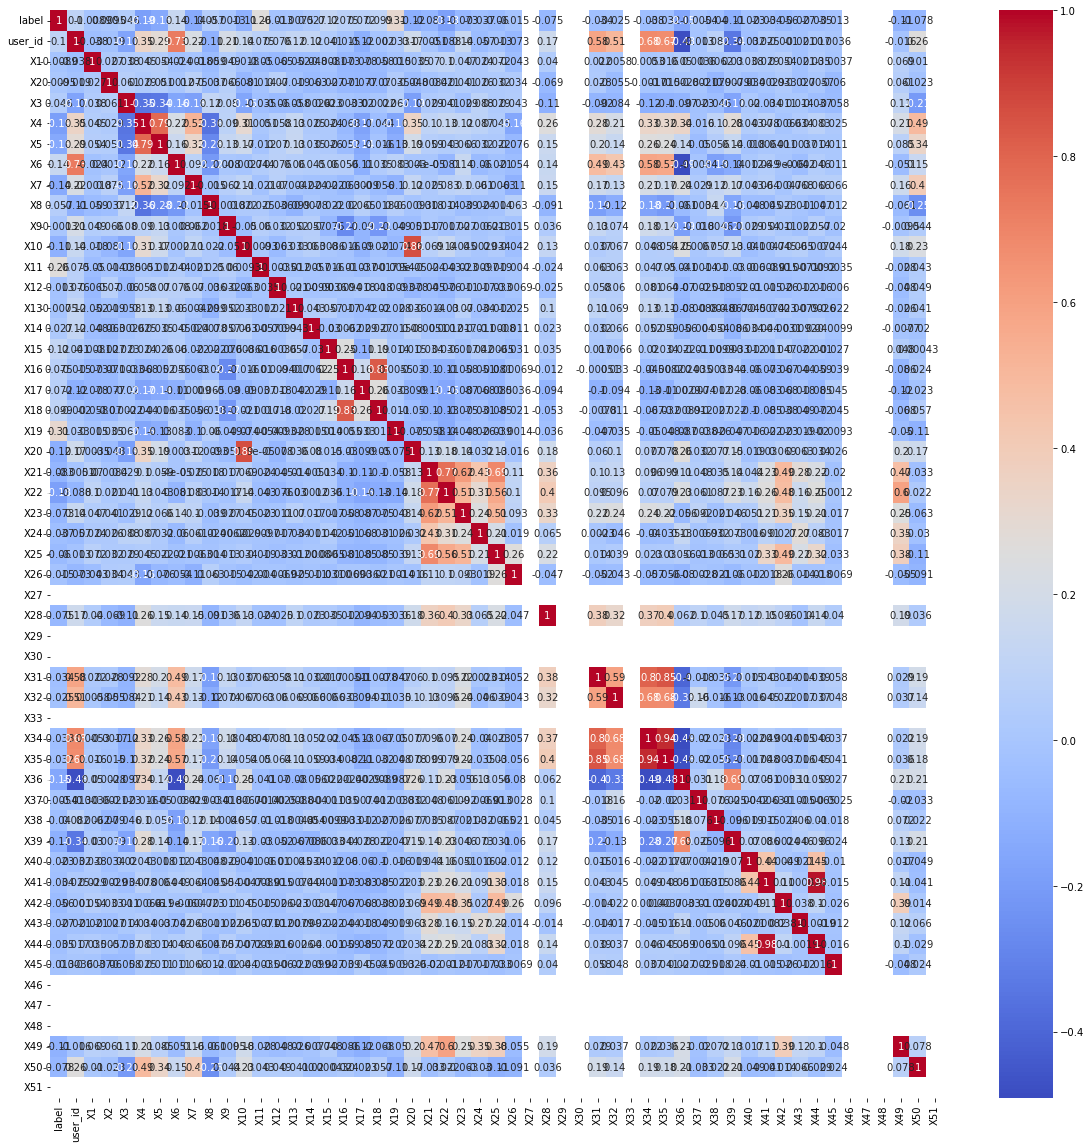

In [178]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), cmap = 'coolwarm', annot=True)
plt.show()

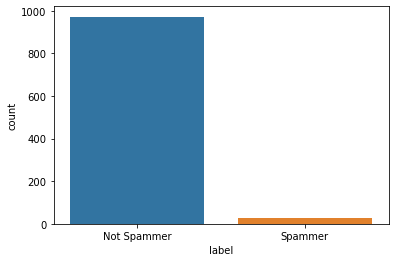

In [179]:
# plot the no of 1's and 0's
g = sns.countplot(train['label'])
g.set_xticklabels(['Not Spammer', 'Spammer'])
plt.show()

In [180]:
train1 = train.dropna()


In [181]:
train1['X13'].isnull().sum()

0

In [182]:
train['X13'].isnull().sum()

0

In [183]:
y = train1.label
X = train1.drop(['label'], axis=1)
print(X.columns, X.shape)

Index(['user_id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51'],
      dtype='object') (1000, 52)


In [184]:
#storing all the columns in a list
allcols = pd.DataFrame(X.columns)
allcols=allcols.drop(0, axis=0)
allcols = np.array(allcols[0])
allcols = allcols.tolist()


# or
#allcols1 = allcols[0]
#allcol = []
#for i, a in enumerate(allcols):
#    if a != 'NaN':
#        allcol.append(a)
#allcol

In [185]:
c =X['X13']
c= c.value_counts()
c=pd.DataFrame(c)
c=c.X13
c = c.tolist()

In [186]:
d = X['X13'].unique()
d = d.astype(int)
d

array([0, 1, 2])

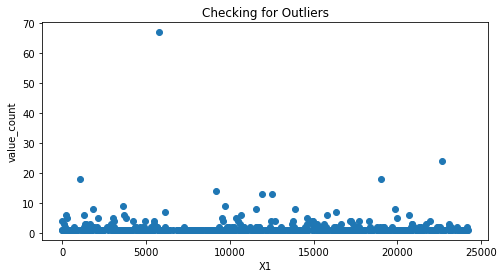

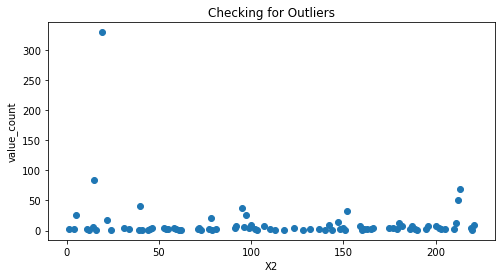

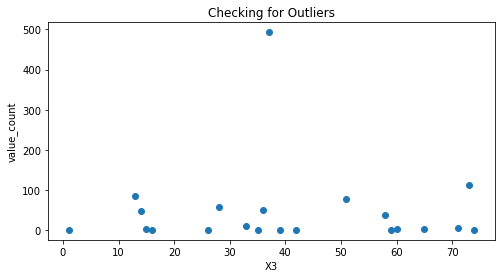

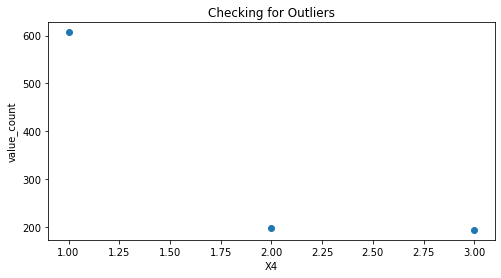

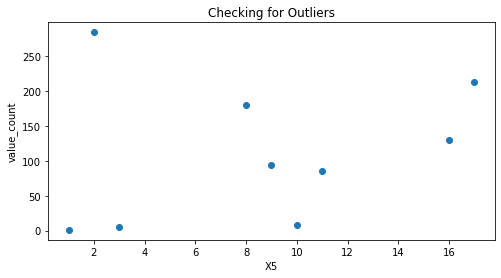

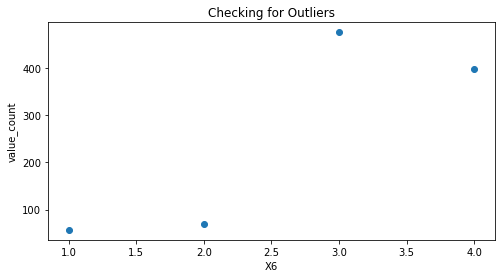

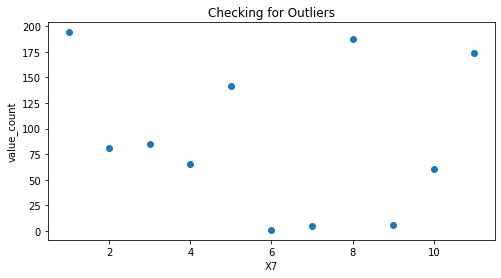

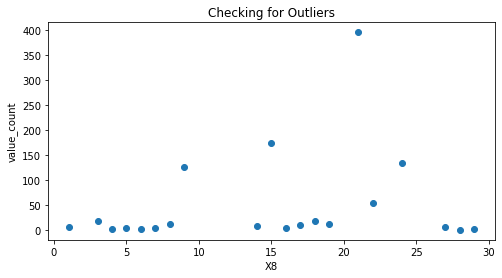

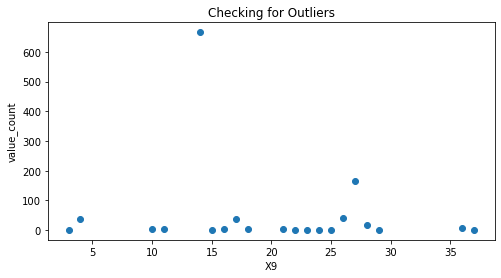

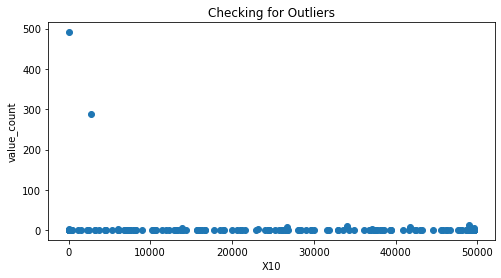

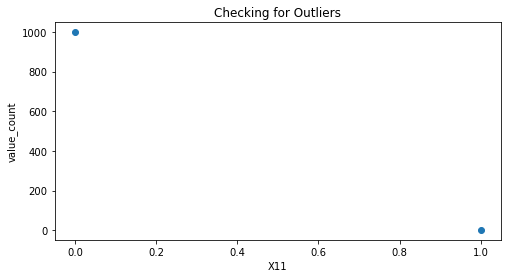

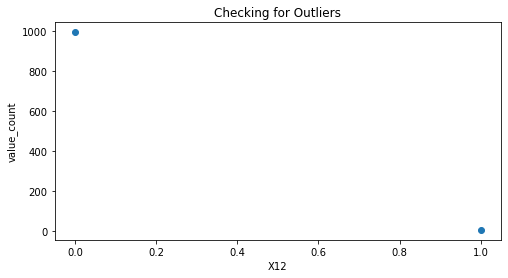

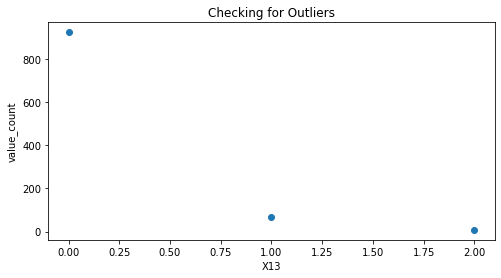

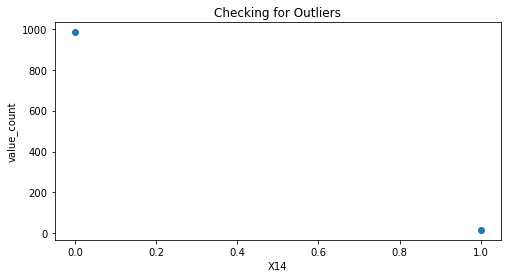

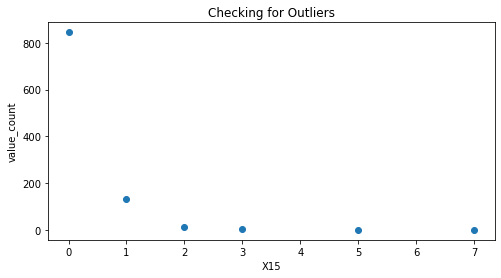

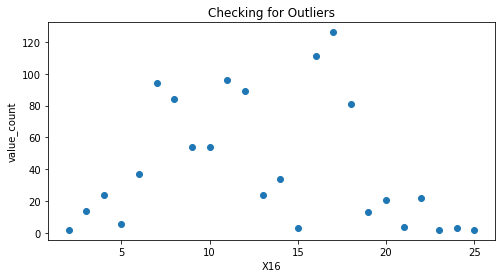

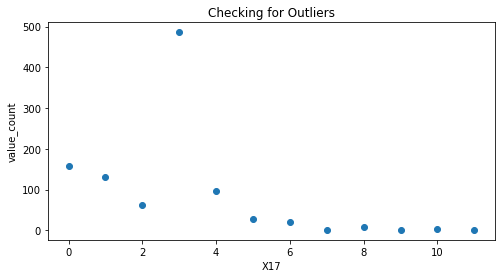

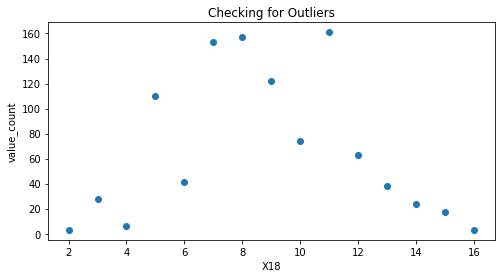

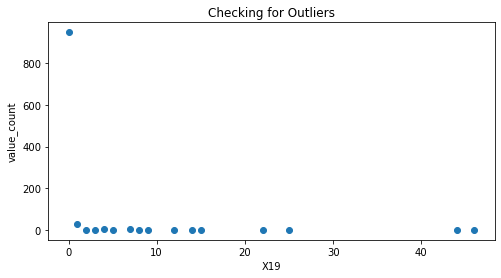

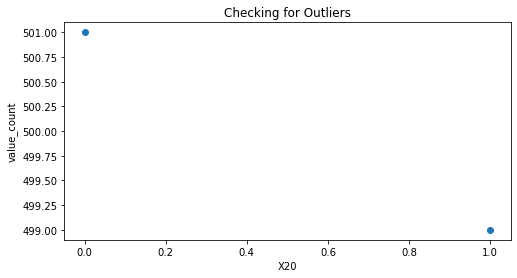

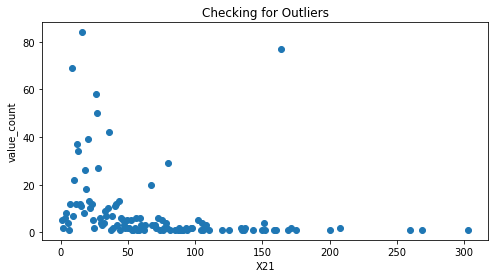

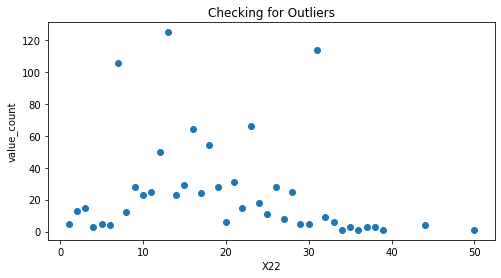

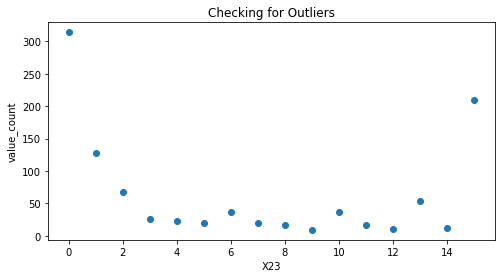

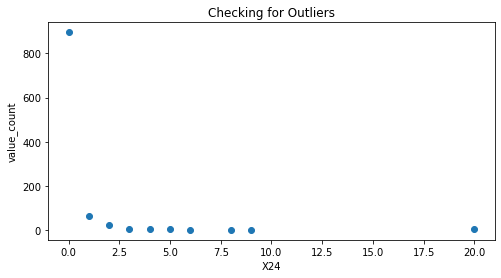

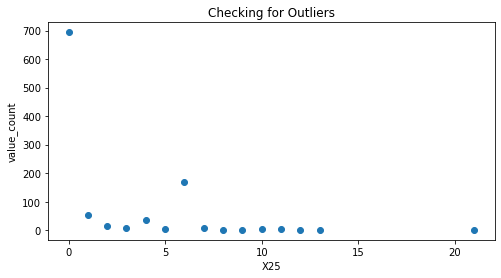

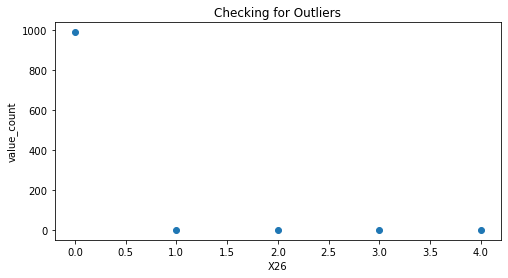

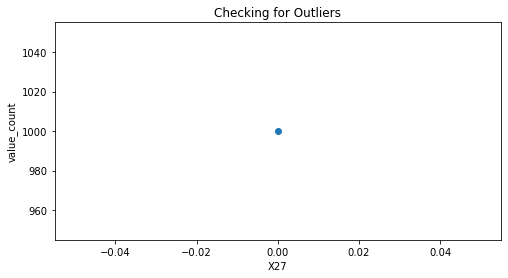

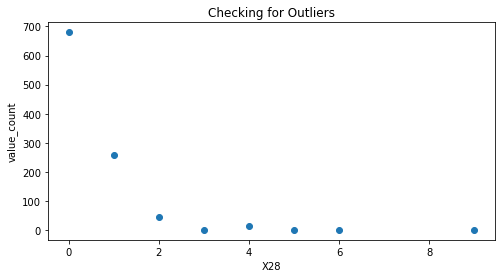

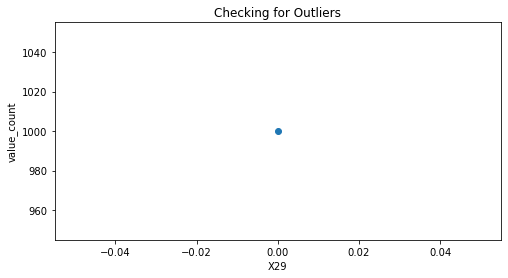

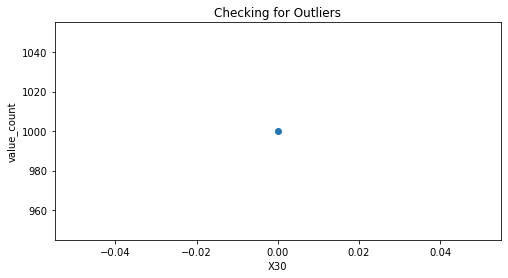

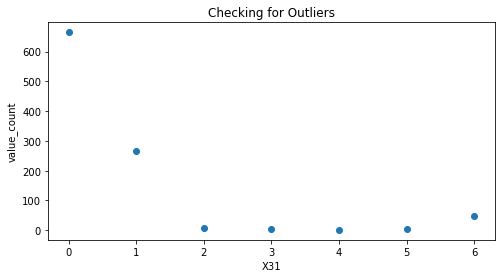

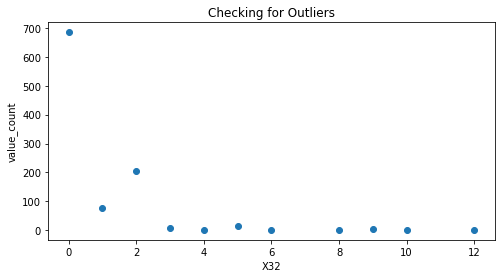

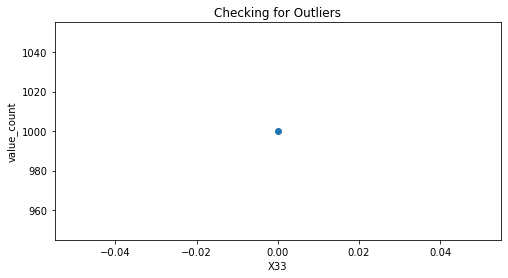

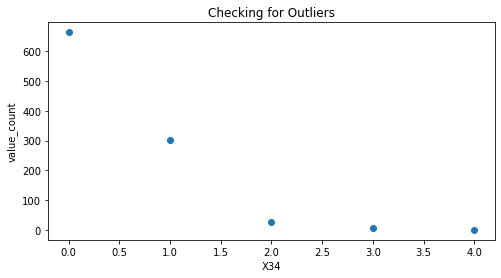

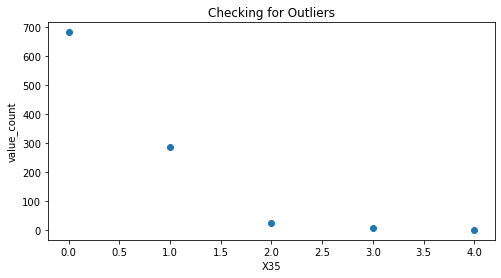

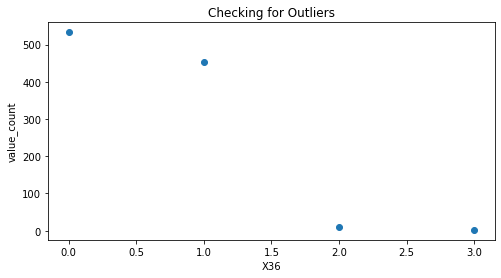

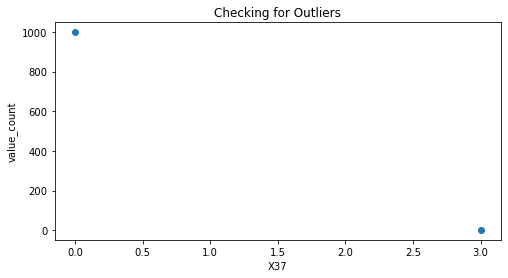

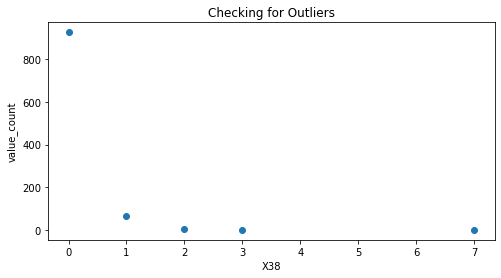

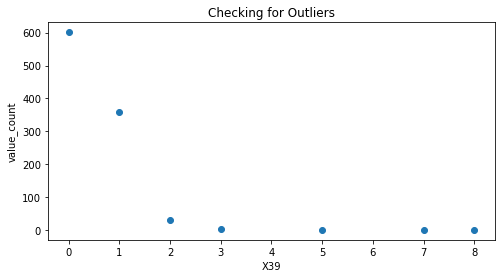

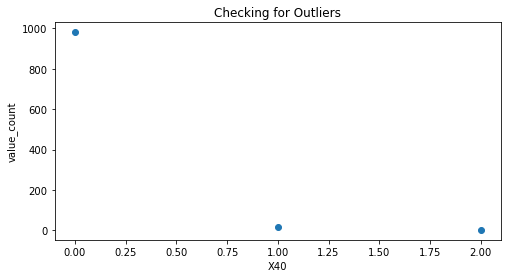

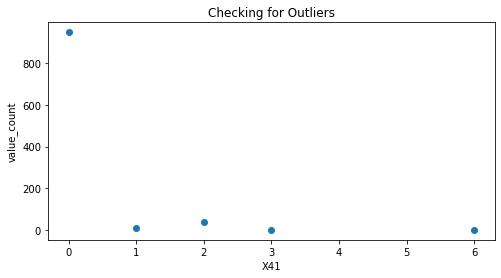

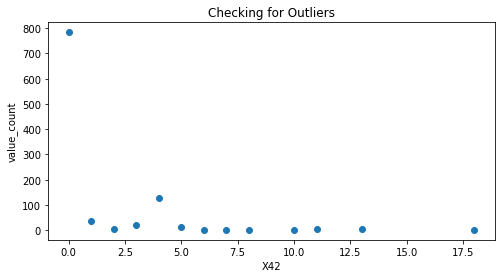

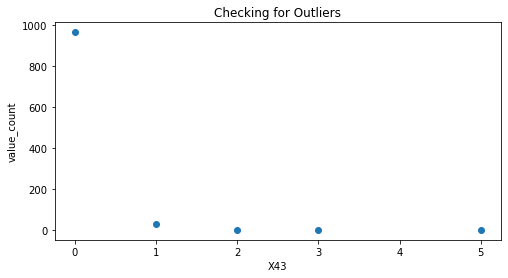

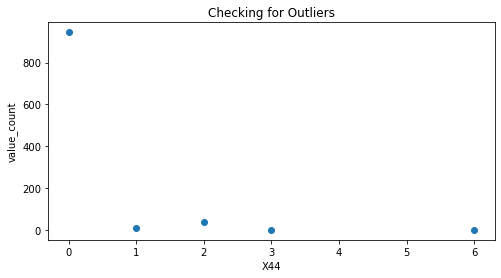

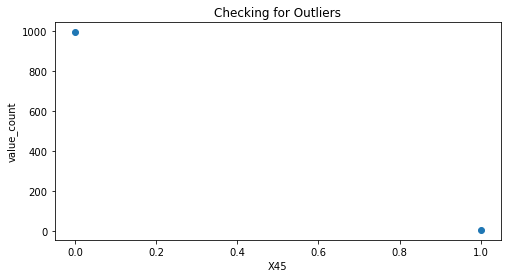

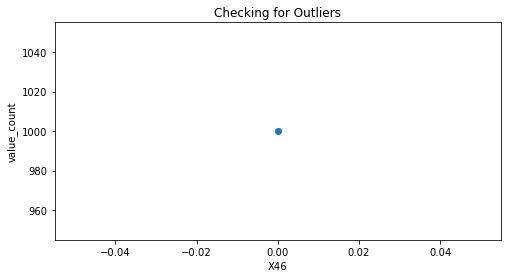

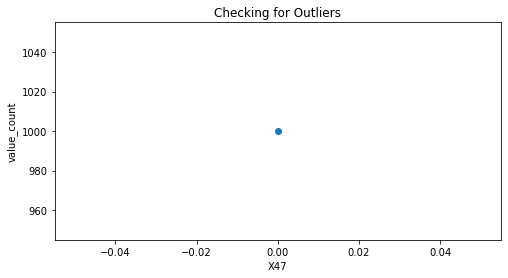

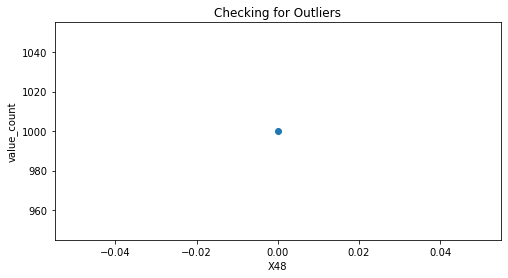

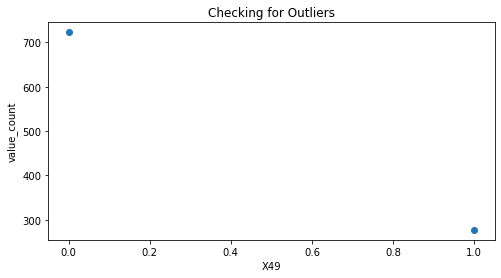

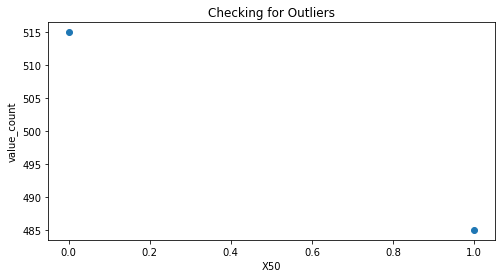

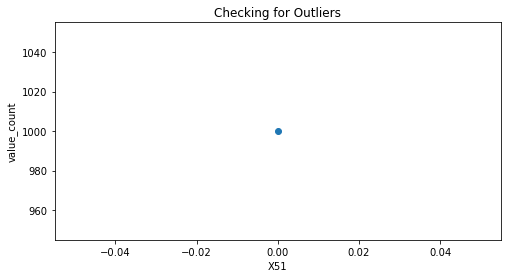

In [187]:
for col in allcols:
    fig, ax = plt.subplots(1,1,figsize=(8,4), sharex=False)
    ax = plt.gca()
    c =X[col]
    c= c.value_counts()
    c=pd.DataFrame(c)
    c=c[col]
    c = c.tolist()
    d = X[col].unique()
    d = d.astype(int)
    ax.scatter(d, c)
    
    
    ax.set_xlabel(col)
    ax.set_ylabel('value_count')
    ax.set_title("Checking for Outliers")

    plt.show()

In [188]:
traina= train1.copy()

In [189]:
traina.loc[traina['X32']== max(traina['X32'])]

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
351334,0,369789,10492,147,13,2,2,4,5,9,14,16697,0,0,0.0,0,0,17,1,11,0,1,63,19,15,0,0,0,0,2,0,0,4,12,0,2,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
traina.loc[traina['X37']== max(traina['X37'])]

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
174849,0,183763,11574,147,14,2,2,3,8,15,14,24526,0,0,0.0,0,0,16,2,10,0,1,74,29,15,0,0,0,0,3,0,0,0,6,0,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [191]:
traina= traina.drop(traina.loc[traina['X32']== max(traina['X32'])].index)

In [192]:
traina.loc[traina['X32']== max(traina['X32'])]

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
359446,0,378305,7885,19,13,3,16,4,9,22,14,44581,0,0,0.0,0,0,15,2,11,2,1,150,34,14,0,0,0,0,9,0,0,3,10,0,3,3,0,0,1,2,0,0,1,0,0,0,0,0,0,1,1,0


In [193]:
traina= traina.drop(traina.loc[traina['X37']== max(traina['X37'])].index)

In [194]:
traina.loc[traina['X37']== max(traina['X37'])]

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
51653,0,54364,5784,19,37,1,2,3,1,21,14,1,0,0,0.0,0,0,17,3,11,0,0,16,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
400346,0,421388,22649,15,73,2,2,4,8,15,27,2711,0,0,0.0,0,1,16,0,11,0,1,164,31,15,0,6,0,0,0,0,0,1,2,0,1,1,0,0,0,0,0,0,4,0,0,0,0,0,0,1,1,0
378098,0,398050,1077,213,13,3,17,4,11,24,27,1,0,1,0.0,0,0,11,0,8,0,0,8,7,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
136168,0,143190,19033,213,51,2,8,3,8,15,14,48955,0,0,0.0,0,0,7,1,7,0,1,26,23,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
107266,0,112742,9177,213,28,3,16,3,5,9,26,1,0,0,0.0,0,0,12,0,9,0,0,27,16,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453664,0,477538,1,213,13,2,2,4,4,22,17,1,0,0,0.0,0,0,8,5,7,0,0,11,10,0,1,0,0,0,0,0,0,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
421131,0,443208,10946,40,71,3,11,4,8,15,14,48955,0,0,0.0,0,0,14,0,10,0,1,19,19,3,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
65267,0,68613,16606,213,36,1,9,3,1,21,14,1,0,0,0.0,0,0,14,0,10,0,0,23,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19480,0,20493,7384,128,71,3,11,1,10,22,26,1,0,0,0.0,0,0,10,2,9,0,0,18,17,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [195]:
traina.loc[traina['X41']== max(traina['X41'])]
traina= traina.drop(traina.loc[traina['X41']== max(traina['X41'])].index)

In [196]:
traina.loc[traina['X41']== max(traina['X41'])]
traina= traina.drop(traina.loc[traina['X41']== max(traina['X41'])].index)

In [197]:
traina.loc[traina['X42']== max(traina['X42'])]
traina= traina.drop(traina.loc[traina['X42']== max(traina['X42'])].index)

In [198]:
traina.loc[traina['X43']== max(traina['X43'])]
traina= traina.drop(traina.loc[traina['X43']== max(traina['X43'])].index)

In [199]:
traina.loc[traina['X41']== max(traina['X41'])]

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
284221,0,299027,22649,15,71,3,11,4,2,15,17,48955,0,0,0.0,1,0,16,0,11,0,1,38,26,4,0,0,0,0,1,0,0,1,2,0,1,1,0,0,0,0,1,2,0,0,2,0,0,0,0,0,0,0
320421,0,337421,15769,213,71,3,11,4,5,9,36,1,0,0,0.0,0,0,14,0,10,1,0,28,14,13,0,0,0,0,2,0,0,2,2,0,2,2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0
442023,0,465257,3865,186,13,3,17,4,3,15,26,10595,0,0,1.0,0,1,14,0,11,0,1,107,30,11,0,5,0,0,1,0,0,1,3,0,1,1,0,0,0,0,0,2,10,0,2,0,0,0,0,1,0,0
156497,0,164538,7278,213,13,3,17,3,8,15,14,1,0,0,0.0,0,1,12,0,10,0,0,171,31,8,2,4,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,6,0,2,0,0,0,0,1,0,0
153866,0,161742,11585,152,13,3,11,3,8,15,26,48955,0,0,0.0,0,0,4,0,4,0,1,28,19,10,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0,2,0,0,2,0,0,0,0,0,0,0
337506,0,355264,4416,40,51,2,8,4,5,9,14,1,0,0,0.0,0,0,12,2,8,0,0,30,25,1,0,1,0,0,1,0,0,1,1,0,1,1,1,0,1,0,2,2,0,0,2,0,0,0,0,0,0,0
330003,0,347429,3419,213,42,2,8,4,5,9,14,1,0,0,0.0,0,0,13,2,11,0,0,29,18,6,0,0,0,0,1,0,0,2,1,0,2,2,0,0,0,1,0,2,0,0,2,0,0,0,0,0,0,0
104956,0,110311,21961,213,16,2,2,3,5,9,26,1,0,0,0.0,0,0,10,0,7,0,0,51,31,8,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,2,1,0,2,0,0,0,0,1,1,0
97768,0,102749,2730,46,13,3,16,3,5,9,14,1,0,0,0.0,0,0,7,2,7,0,0,18,14,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,2,0,0,2,0,0,0,0,0,0,0


In [200]:
traina.loc[traina['X42']== max(traina['X42'])]

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
290559,0,305723,9552,213,36,1,9,4,1,21,18,1,0,0,0.0,0,0,10,0,10,1,0,52,20,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0
157572,0,165660,11585,152,13,3,17,3,8,15,14,48955,0,0,1.0,0,0,9,2,8,0,1,62,25,7,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,13,0,0,0,0,0,0,1,1,0


In [201]:
traina.loc[traina['X43']== max(traina['X43'])]

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
201668,0,211994,148,14,13,3,17,3,3,15,14,48955,0,0,0.0,0,0,9,0,6,0,1,303,33,13,1,10,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2,3,0,0,0,0,0,1,1,0


In [202]:
traina.loc[traina['X44']== max(traina['X44'])]
traina= traina.drop(traina.loc[traina['X44']== max(traina['X44'])].index)

In [203]:
ya = traina.label
Xa = traina.drop(['user_id','label', 'X38', 'X34', 'X32', 'X24', 'X27', 'X29', 'X30', 'X33', 'X46'], axis=1)
print(Xa.columns, Xa.shape)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X25', 'X26', 'X28', 'X31', 'X35', 'X36', 'X37', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X47', 'X48', 'X49', 'X50',
       'X51'],
      dtype='object') (982, 42)


In [204]:
#CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
X_train, X_valid, y_train, y_valid = train_test_split(Xa, ya, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.0, random_state= 42)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = 'macro'))

#0.8735089632624917 (1.79 after dropping all Outliers except X31)
#0.8707543373468519 (1.8 after dropping all Outliers)

CatBoost accuracy_score on validation set is :  0.9847715736040609
CatBoost F1 score on validation set is :  0.7818383167220377


In [205]:
0.8711374539067224

0.8711374539067224

In [206]:
test2 = test.drop(['X38', 'X34', 'X32', 'X24', 'X27', 'X29', 'X30', 'X33', 'X46'], axis=1)

In [207]:
testa = test2.copy()

In [208]:
testa = testa.drop(['user_id'], axis =1)

In [209]:
scaler =StandardScaler()
scaler = scaler.fit(Xa)
Xas= scaler.transform(Xa)
testsc= scaler.transform(testa)

In [210]:
#CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
X_train, X_valid, y_train, y_valid = train_test_split(Xas, ya, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.3)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = 'macro'))
#0.8744640648588989 (2.21 after scaling and dropping all Outliers)

CatBoost accuracy_score on validation set is :  0.9847715736040609
CatBoost F1 score on validation set is :  0.7818383167220377


In [211]:
0.8717163420513123

0.8717163420513123

In [212]:
#CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 1.9)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = 'macro'))


CatBoost accuracy_score on validation set is :  0.99
CatBoost F1 score on validation set is :  0.7474747474747474


In [213]:
cm = confusion_matrix(y_valid, cat_pred)
cm

array([[197,   0],
       [  2,   1]], dtype=int64)

In [214]:
print(classification_report(y_valid,cat_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       197
           1       1.00      0.33      0.50         3

    accuracy                           0.99       200
   macro avg       0.99      0.67      0.75       200
weighted avg       0.99      0.99      0.99       200



<AxesSubplot:>

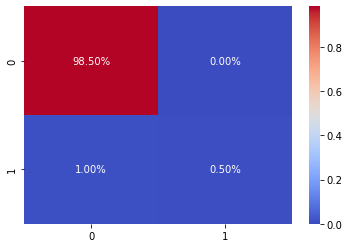

In [215]:
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'coolwarm')

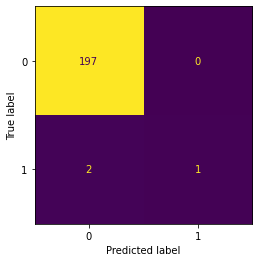

In [216]:
plot_confusion_matrix(cat, X_valid , y_valid  , colorbar= False )

In [217]:
cat_viz= cat.get_feature_importance(prettified=True)
cat_viz.head()

,Feature Id,Importances
0,X6,8.675263
1,X19,8.404446
2,user_id,7.539573
3,X22,6.630296
4,X5,5.900074


<AxesSubplot:xlabel='Importances', ylabel='Feature Id'>

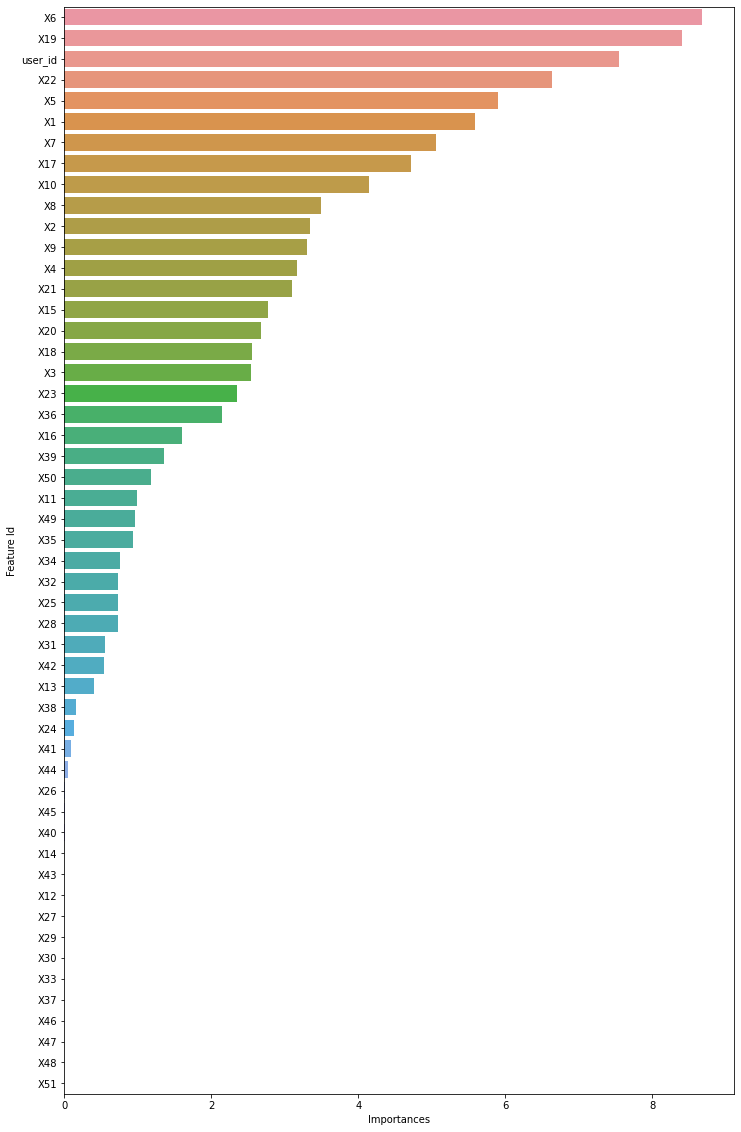

In [218]:
plt.figure(figsize= (12,20))
sns.barplot(x='Importances', y= 'Feature Id', data=cat_viz, label="Feature Importances", orient= 'h')#, color_palette='tab10')
#sns.set_color_palette('hls', 8)

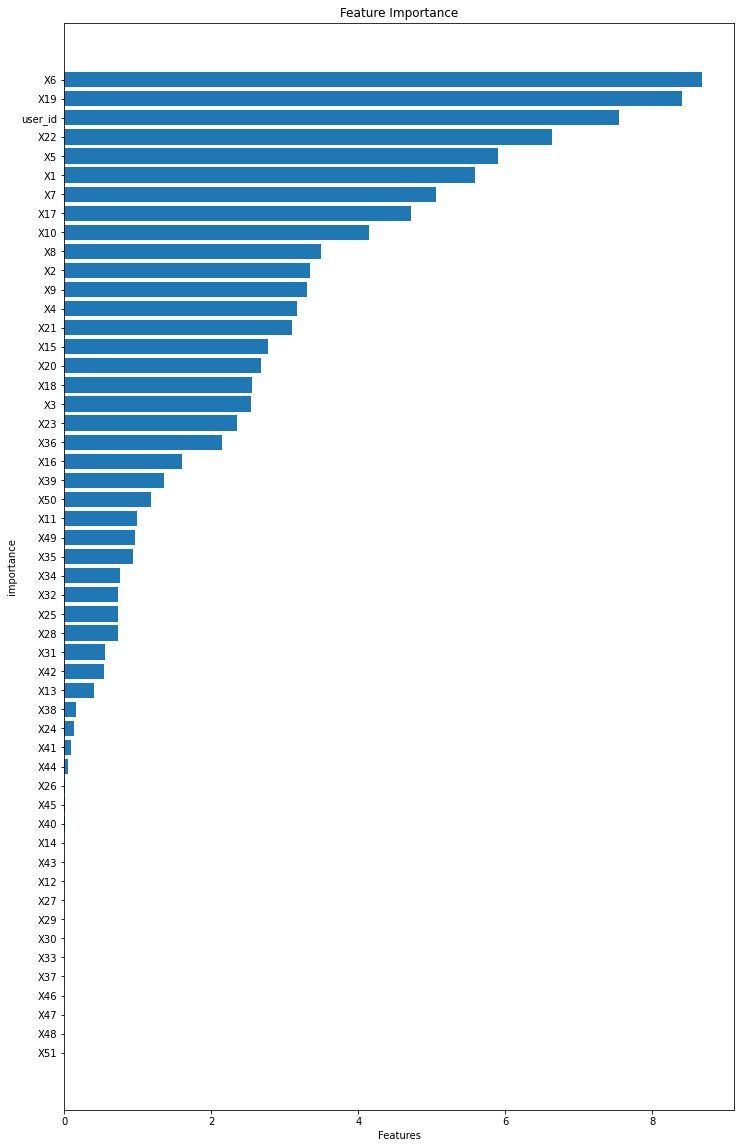

In [219]:
fig, ax = plt.subplots(figsize = (12,20))
plt.barh(cat_viz['Feature Id'], cat_viz['Importances'])
#plt.xticks(rotation=90)
plt.xlabel('Features')
ax.invert_yaxis()
plt.ylabel('importance')
plt.title('Feature Importance')
plt.show()

In [220]:
y1 = train1.label
X1 = train1.drop(['label', 'X38', 'X34', 'X32', 'X24', 'X27', 'X29', 'X30', 'X33', 'X46'], axis=1)
print(X1.columns, X1.shape)

Index(['user_id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X25', 'X26', 'X28', 'X31', 'X35', 'X36', 'X37',
       'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X47', 'X48', 'X49',
       'X50', 'X51'],
      dtype='object') (1000, 43)


In [221]:
y1 = train1.label
X2 = train1.drop(['label', 'X38', 'X34', 'X32', 'X24', 'X27', 'X29', 'X30', 'X33', 'X46', 'user_id'], axis=1)
print(X1.columns, X1.shape)

Index(['user_id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X25', 'X26', 'X28', 'X31', 'X35', 'X36', 'X37',
       'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X47', 'X48', 'X49',
       'X50', 'X51'],
      dtype='object') (1000, 43)


In [222]:
train[['label', 'X38', 'X34', 'X32', 'X24', 'X27', 'X29', 'X30', 'X33', 'X46']]

,label,X38,X34,X32,X24,X27,X29,X30,X33,X46
51653,0,0,0,0,0,0,0,0,0,0
400346,0,0,1,2,0,0,0,0,0,0
378098,0,0,1,2,0,0,0,0,0,0
136168,0,0,0,0,0,0,0,0,0,0
107266,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
453664,0,0,1,1,1,0,0,0,0,0
421131,0,0,1,1,0,0,0,0,0,0
65267,0,0,0,0,0,0,0,0,0,0
19480,0,0,0,0,0,0,0,0,0,0


In [223]:
test1 = test.drop(['user_id'], axis =1)

In [224]:
test2 = test.drop(['X38', 'X34', 'X32', 'X24', 'X27', 'X29', 'X30', 'X33', 'X46'], axis=1)

In [225]:
test3 = test.drop(['X38', 'X34', 'X32', 'X24', 'X27', 'X29', 'X30', 'X33', 'X46', 'user_id'], axis=1)

In [226]:
scaler =StandardScaler()
scaler = scaler.fit(X1)
X1s= scaler.transform(X1)
testsc= scaler.transform(test2)

In [227]:
scaler =StandardScaler()
scaler = scaler.fit(X2)
X2s= scaler.transform(X2)
testsc1= scaler.transform(test3)

In [228]:
#CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
X_train, X_valid, y_train, y_valid = train_test_split(X2s, y1, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.203)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = 'macro'))


CatBoost accuracy_score on validation set is :  0.99
CatBoost F1 score on validation set is :  0.7474747474747474


In [229]:
0.8700685807336228-0.8700449293369972

2.3651396625634646e-05

In [230]:
#CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
X_train, X_valid, y_train, y_valid = train_test_split(X1s, y1, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.203)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = 'macro'))


CatBoost accuracy_score on validation set is :  0.99
CatBoost F1 score on validation set is :  0.7474747474747474


In [231]:
scale_pos_weight = list(np.linspace(1.0,6.5,56))
iterations = list(range(100,1500,50))
parameters = {'depth':[3,1,2,6,4,5,7,8,9,10,11,12],
          'iterations':[250,100,500,1000,],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,7,9,10,100],
          'border_count':[32,5,10,20,50,100,200],
          #'simple_ctr':[50,5,10,20,100,200],
          'thread_count':[1,2,3,4,5],
          'scale_pos_weight': scale_pos_weight}
clf = CatBoostClassifier(verbose=False)#, scale_pos_weight = 2.1)
#test_pool= Pool(X_valid,y_valid)

grid_cv = GridSearchCV(clf, parameters, scoring = make_scorer(f1_score, average = 'macro'))
grid_cv = grid_cv.fit(X1, y1)

print("Our optimized catboost model is:")
grid_cv.best_estimator_

KeyboardInterrupt: 

In [ ]:
#grid

In [232]:
#CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.1)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = 'macro'))


CatBoost accuracy_score on validation set is :  0.99
CatBoost F1 score on validation set is :  0.7474747474747474


In [233]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.1)
test_pool= Pool(X_valid,y_valid)

In [234]:
allcols = pd.DataFrame(X.columns)
#allcols=allcols.drop(0, axis=0)
allcols = np.array(allcols[0])
allcols = allcols.tolist()

In [235]:
cat = CatBoostClassifier(verbose=False, scale_pos_weight=1.9)
cat.fit(X, y)
cat_p = cat.predict(test)


In [236]:
train2=train1.copy()
y = train2.label
X = train2.drop(['label', 'user_id'], axis=1)
print(X.columns, X.shape)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51'],
      dtype='object') (1000, 51)


In [237]:
#CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.2)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = 'macro'))


CatBoost accuracy_score on validation set is :  0.99
CatBoost F1 score on validation set is :  0.7474747474747474


In [238]:
#CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
#{'depth':[3,1,2,6,4,5,7,8,9,10,11,12], 'iterations':[250,100,500,1000],
    #'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
  #        'l2_leaf_reg':[3,1,5,10,100],
  #        'border_count':[32,5,10,20,50,100,200],
    #      'thread_count':[1,2,3,4,5]}
X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 1.929)#, depth=8)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = 'macro'))
#0.8703474609487533

CatBoost accuracy_score on validation set is :  0.99
CatBoost F1 score on validation set is :  0.7474747474747474


In [239]:
#CatBoostClassifier(loss_function='MultiClassOneVsAll', class_weights=class_weights)
#{'depth':[3,1,2,6,4,5,7,8,9,10,11,12], 'iterations':[250,100,500,1000],
    #'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
  #        'l2_leaf_reg':[3,1,5,10,100],
  #        'border_count':[32,5,10,20,50,100,200],
    #      'thread_count':[1,2,3,4,5]}
X_train, X_valid, y_train, y_valid = train_test_split(Xas, ya, test_size=0.2, random_state=42) 
xg = XGBClassifier(scale_pos_weight = 1.901)
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_valid)
print("XGBoost accuracy_score on validation set is : ",accuracy_score(y_valid,xg_pred))
print("XGBoost F1 score on validation set is : ",f1_score(y_valid,xg_pred, average = 'macro'))
#0.8616362324390419
#0.8630931789470004

XGBoost accuracy_score on validation set is :  0.9796954314720813
XGBoost F1 score on validation set is :  0.661512027491409


In [240]:
len(train1)

1000

In [241]:
train1.user_id.nunique()

1000

In [242]:
train1.user_id.unique()

array([ 54364, 421388, 398050, 143190, 112742, 219392,  93311, 322877,
       138578, 417983, 113320, 294326, 135051,  85710, 141497, 320212,
       172099, 285285, 290039, 239036,  82332, 273394, 370496,  69235,
       426493, 241617, 402581,  92029,    770,  60857, 123830, 479572,
       100903, 181749,  25897, 375317, 304508,  13235, 252663,  48020,
       273848, 388997, 321699, 182314, 287689, 374332, 206560, 131497,
       398536, 242654,  43627, 162410, 175764, 301673, 390778, 280075,
        65833, 369054, 431139, 299027, 429620, 375612, 475599,  28656,
        82127, 388763, 480204,  34310, 363253, 441490, 373600, 239736,
       195450,   8441, 171256,  94111, 460199, 152246, 146825, 115858,
       449640, 323122, 232476, 290530, 352153, 218568, 428914, 141770,
       181587, 285648, 326239, 244408, 281254, 226771, 362093, 355113,
       180850, 302290, 228569, 224463, 337421, 125885, 370059,   7649,
       120541, 377308,  72511, 411654, 467224, 305723, 157390, 129335,
      

In [243]:

cat = CatBoostClassifier(verbose=False, scale_pos_weight=2.003)
cat = cat.fit(X2s, y1)
cat_p = cat.predict(testsc1)
#wihout user_id and scaled
#highest is 2.003
#start from 2.01 or 2.0011

In [244]:
cat = CatBoostClassifier(verbose=False, scale_pos_weight=2.004)
cat = cat.fit(X1s, y1)
cat_p = cat.predict(testsc)
#highest is 2.003
#start from 2.002 and then 2.004
#this one is with user_id and scaled

In [245]:
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.0, random_state =42)#, depth=6)
cat = cat.fit(X1, y1)
cat_p = cat.predict(test2)
#overall highest is 1.929
#this one is with user_id and not scaled

In [246]:
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.1, random_state =42)#, depth=6)
cat = cat.fit(Xa, ya)
cat_p = cat.predict(test2)

In [247]:
submission = pd.DataFrame(columns=['user_id', 'prediction'])
submission.head()

,user_id,prediction


In [248]:
submission.user_id = test.user_id
submission.head()

,user_id,prediction
11639,237554,NaN
11717,238769,NaN
998,20300,NaN
24012,480403,NaN
13624,276527,NaN


In [249]:
submission.prediction = cat_p
submission

,user_id,prediction
11639,237554,0
11717,238769,0
998,20300,0
24012,480403,0
13624,276527,0
...,...,...
20766,414970,0
11944,243616,0
5500,112886,0
14733,297968,0


In [250]:
submission.to_csv('submission10.csv', index=False)

In [251]:
def stratified_cross_val(X, y, test_data, splits=8, seed=42):
    skf =  StratifiedKFold(n_splits=splits, shuffle=True, random_state=seed)

    scores = [] # a list to store our validation scores
    preds = []  # a list to store our prediction per splits
    model =  CatBoostClassifier(verbose=False, scale_pos_weight=1.929)# Instantiate your model

    i = 0
    for train, test in skf.split(X, y):
        x_train, x_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        model.fit(x_train, y_train)
        score = f1_score(y_test, model.predict(x_test), average ='macro')
        pred = model.predict_proba(test_data)[:, 1]
        acc = accuracy_score(y_test, model.predict(x_test))
        print(f'Number of splits trained : {i} \t F1 Score:  {score} \t Accuracy Score:  {acc}')
        scores.append(score)
        preds.append(pred)
        i += 1
    
    print('The average F1 Score: ', np.mean(scores), np.mean(acc)) # The mean of our validation scores

    return preds

In [252]:
preds = stratified_cross_val(X= X1 ,y = y1, test_data = test2)

Number of splits trained : 0 	 F1 Score:  0.8292349726775956 	 Accuracy Score:  0.984
Number of splits trained : 1 	 F1 Score:  0.7459349593495934 	 Accuracy Score:  0.984
Number of splits trained : 2 	 F1 Score:  0.6938775510204083 	 Accuracy Score:  0.976
Number of splits trained : 3 	 F1 Score:  0.7459349593495934 	 Accuracy Score:  0.984
Number of splits trained : 4 	 F1 Score:  0.6938775510204082 	 Accuracy Score:  0.976
Number of splits trained : 5 	 F1 Score:  0.6938775510204082 	 Accuracy Score:  0.976
Number of splits trained : 6 	 F1 Score:  0.9265138154027042 	 Accuracy Score:  0.992
Number of splits trained : 7 	 F1 Score:  0.8292349726775956 	 Accuracy Score:  0.984
The average F1 Score:  0.7698107915647884 0.984


In [253]:
preds_mean = np.mean(preds, axis=0) # The average of the predictions per row

predictions_final = [] # Saving the final predicitions in a list

""" We trained our model in a StratifiedKFold and made probability predicitions per split, to get our final prediction, we go ahead to set a threshold of 0.35, 
where if our probability value of a claim being made is greater than 0.4, our final prediction is set to 1, else it is set to 0"""

for x in preds_mean:
    if x > 0.35:
        predictions_final.append(1)
    else:
        predictions_final.append(0)



In [254]:
submission.prediction = predictions_final
submission

,user_id,prediction
11639,237554,0
11717,238769,0
998,20300,0
24012,480403,0
13624,276527,0
...,...,...
20766,414970,0
11944,243616,0
5500,112886,0
14733,297968,0


In [255]:
submission.to_csv('submissionprob.csv', index=False)

In [256]:
emb_imp = SimpleImputer(strategy='most_frequent')
emb = ['X13']
emb_imp.fit(train[emb])
train[emb] = emb_imp.fit_transform(train[emb])

In [257]:
train['X13'].isnull().sum()

0

In [258]:
train['X13'].nunique()

3

In [259]:
y5 = train.label
X5 = train.drop(['label', 'X38', 'X34', 'X32', 'X24', 'X27', 'X29', 'X30', 'X33', 'X46'], axis=1)
print(X5.columns, X5.shape)

Index(['user_id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X25', 'X26', 'X28', 'X31', 'X35', 'X36', 'X37',
       'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X47', 'X48', 'X49',
       'X50', 'X51'],
      dtype='object') (1000, 43)


In [260]:
X_train, X_valid, y_train, y_valid = train_test_split(X5, y5, test_size=0.2, random_state=42) 
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.01)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = 'macro'))

CatBoost accuracy_score on validation set is :  0.99
CatBoost F1 score on validation set is :  0.7474747474747474


In [261]:
0.870532655209828

0.870532655209828

In [262]:
from sklearn.utils.class_weight import compute_class_weight
 
classes = np.unique(y_train)
weights = compute_class_weight(class_weight = {0: 0.51388033, 1: 18.51109542 }, classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

cat = CatBoostClassifier(verbose=False, class_weights=class_weights)#scale_pos_weight = 2.011)

In [263]:
cat = CatBoostClassifier(verbose=False, scale_pos_weight = 2.011)#, random_state =42)#, depth=6)
cat = cat.fit(X5, y5)
cat_p = cat.predict(test2)

In [264]:
submission.prediction = cat_p
submission

,user_id,prediction
11639,237554,0
11717,238769,0
998,20300,0
24012,480403,0
13624,276527,0
...,...,...
20766,414970,0
11944,243616,0
5500,112886,0
14733,297968,0


In [265]:
submission.to_csv('submission15.csv', index=False)

In [266]:
X_train, X_valid, y_train, y_valid = train_test_split(X5, y5, test_size=0.2, random_state=42) 
sgd =SGDClassifier(loss = 'log_loss', class_weight = {0: 0.51388033, 1: 18.51109542 },max_iter= 1000)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_valid)
print("SGD accuracy_score on validation set is : ",accuracy_score(y_valid,sgd_pred))
print("SGD F1 score on validation set is : ",f1_score(y_valid,sgd_pred, average = 'macro'))

SGD accuracy_score on validation set is :  0.985
SGD F1 score on validation set is :  0.4962216624685139


In [267]:
(len(X_train)/(2 *np.bincount(y_train)))

array([ 0.51612903, 16.        ])

In [268]:
y_train

57859     0
58275     0
126359    0
10671     0
166879    0
         ..
68993     0
224012    0
239567    0
241734    0
351604    0
Name: label, Length: 800, dtype: int64

In [269]:
np.bincount(y_train)

array([775,  25], dtype=int64)

In [270]:
np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))

array([1, 3, 1, 1, 0, 0, 0, 1], dtype=int64)

In [271]:
np.array([0, 1, 1, 3, 2, 1, 7])

array([0, 1, 1, 3, 2, 1, 7])

In [272]:
spam= len(y_train.loc[y_train==0])/len(y_train)
not_spam=len(y_train.loc[y_train==1])/len(y_train)
scale = np.sqrt(len(y_train.loc[y_train==0])/len(y_train.loc[y_train==1]))
print('Spam: {:.2f}'.format(spam))
print('Not_Spam: {:.2f}'.format(not_spam))
print('Scale: {:.2f}'.format(scale))

Spam: 0.97
Not_Spam: 0.03
Scale: 5.57
